In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.interpolate import interp2d

### Import functions
See core.py for further details

In [3]:
import core

### Make some data
Three use cases
- partial nans
- all nan
- full

In [4]:
data = np.random.random((100,100))

In [5]:
data[10:20,10:20] = np.nan

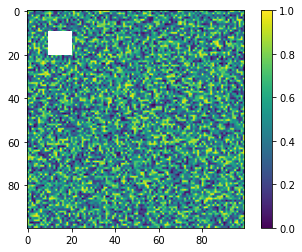

In [6]:
plt.colorbar(plt.imshow(data,vmin=0,vmax=1))

In [7]:
positions = [(9,10), (15,15), (40,40)]

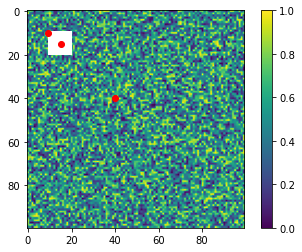

In [8]:
plt.colorbar(plt.imshow(data,vmin=0,vmax=1))
plt.scatter(*zip(*positions), c='r')

### Test inpolation methods
- Nearest Neighbor
- Inverse Distance Weighting
- linear
- cubic
- quintic

Optimal IDW power:, 19.900000000000002


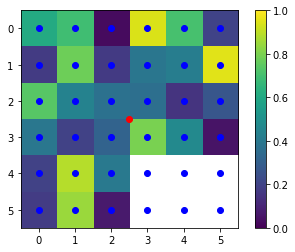

mean: 0.4415379364014178
IDW: 0.46319246485335225
nearest: 0.37175713333764715
scipy linear: nan
scipy cubic: nan
scipy quintic: nan


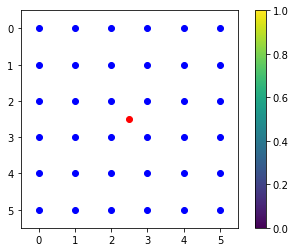

No data in window. Consider increasing window size.


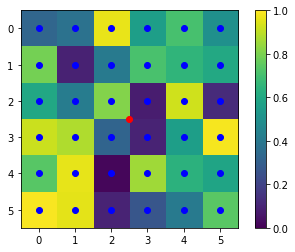

mean: 0.5756466420776517
IDW: 0.3294938884076206
nearest: 0.8155820311004937
scipy linear: 0.3294938287568928
scipy cubic: 0.2246031253642907
scipy quintic: 0.22675084900699002


In [9]:
dx=3
dy=3
spacing = 1

IDW_power = core.find_optimal_IDW_power(positions,data,dx=dx,dy=dy,spacing=spacing,powers= np.arange(0,20,0.1))

for p in positions:
    #slice out window
    window = data[p[0]-dx:p[0]+dx, p[1]-dy:p[1]+dy]
    
    # get center point coordinate in window
    center = dx-spacing/2,dy-spacing/2
    
    # extract window coordinates
    coords = []
    for x in np.arange(0,window.shape[0],1):
        for y in np.arange(0,window.shape[1],1):
            coords.append((x,y))
    
    coords_x = np.array(coords)[:,0]
    coords_y = np.array(coords)[:,1]
    
    plt.colorbar(plt.imshow(window,vmin=0,vmax=1))
    plt.scatter(center[0],center[1], c='r')
    plt.scatter(coords_x,coords_y, c='b')
    plt.show()
    
    if np.isnan(window).all():
        print('No data in window. Consider increasing window size.')
        
    else:
    
        print('mean:',np.nanmean(window))
        print('IDW:', core.IDW(window,coords_x,coords_y,center,IDW_power))
        print('nearest:', core.nearest_neighbor(window,coords_x,coords_y,center))
        print('scipy linear:',core.scipy_methods(window,coords_x,coords_y,center,kind= 'linear'))
        print('scipy cubic:',core.scipy_methods(window,coords_x,coords_y,center,kind= 'cubic'))
        print('scipy quintic:',core.scipy_methods(window,coords_x,coords_y,center,kind= 'quintic'))

### Try to interpolate nans with scipy.interpolate.griddata

Optimal IDW power:, 19.900000000000002


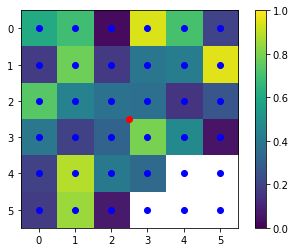

mean: 0.4383884876032746
IDW: 0.4631924615436945
nearest: 0.37175713333764715
scipy linear: nan
scipy cubic: nan
scipy quintic: nan

No data in window. Consider increasing window size.


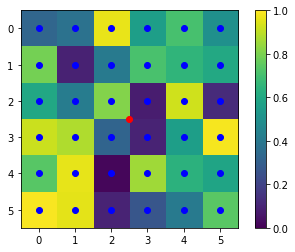

mean: 0.5756466420776517
IDW: 0.3294938884076206
nearest: 0.8155820311004937
scipy linear: 0.3294938287568928
scipy cubic: 0.2246031253642907
scipy quintic: 0.22675084900699002


In [10]:
dx=3
dy=3
spacing = 1

IDW_power = core.find_optimal_IDW_power(positions,data,dx=dx,dy=dy,spacing=spacing,powers= np.arange(0,20,0.1))

for p in positions:
    #slice out window
    window = data[p[0]-dx:p[0]+dx, p[1]-dy:p[1]+dy]
    
    # get center point coordinate in window
    center = dx-spacing/2,dy-spacing/2
    
    # extract window coordinates
    points = []
    values = []
    coords = []
    for x in np.arange(0,window.shape[0],1):
        for y in np.arange(0,window.shape[1],1):

            if not np.isnan(window[x,y]):
                points.append((x,y))
                values.append(window[x,y])
            coords.append((x,y))

    points = np.array(points)
    values = np.array(values)
    coords = np.array(coords)
    
    coords_x = np.array(coords)[:,0]
    coords_y = np.array(coords)[:,1]

    if np.isnan(window).all():
        print('\nNo data in window. Consider increasing window size.')
        
    else:
        window = scipy.interpolate.griddata(points,values,(coords_x,coords_y), method='cubic',).reshape(6,6)
        plt.colorbar(plt.imshow(window,vmin=0,vmax=1))
        plt.scatter(center[0],center[1], c='r')
        plt.scatter(coords_x,coords_y, c='b')
        plt.show()
        print('mean:',np.nanmean(window))
        print('IDW:', core.IDW(window,coords_x,coords_y,center,power=IDW_power))
        print('nearest:', core.nearest_neighbor(window,coords_x,coords_y,center))
        print('scipy linear:',core.scipy_methods(window,coords_x,coords_y,center,kind= 'linear'))
        print('scipy cubic:',core.scipy_methods(window,coords_x,coords_y,center,kind= 'cubic'))
        print('scipy quintic:',core.scipy_methods(window,coords_x,coords_y,center,kind= 'quintic'))

## Takeaways:

- mean is never really accurate
- IDW is robust to nans, similar to scipy linear, and better than nearest neighbor
- scipy.interpolate.griddata fills in some data, but not enough to use scipy point interpolation methods